In [1]:
%cd "../.."

/home/ensai/projet-statistique-2022


In [4]:
from gensim import models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import json
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import hdbscan as HD

import seaborn as sns

from word_embedding.distance_wmd import *
import doc_embedding.moyenne as moyenne
from reduction_dim.correlation_matrix import *
import clustering.fit_clustering as CL 

import warnings
# warnings.filterwarnings("ignore", category=RuntimeWarning)
# warnings.filterwarnings("ignore", category=FutureWarning)

# skipgramgram

In [6]:
ev = models.KeyedVectors.load_word2vec_format(f"data/tuning/skipgram.kv")

with open('data/docs.json', encoding = "utf8") as f:
    docs = json.load(f)
print(f"Nombre de documents : {len(docs)}")

#Read moy matrix
mat_skipgram_moy = moyenne.word_emb_vers_doc_emb_moyenne(docs, ev, methode = 'TF')
print(f"mat_skipgram_moy shape {mat_skipgram_moy.shape}")

Nombre de documents : 9501
mat_cbow_moy shape (9501, 5)


# Comparaison HDBSCAN

# Avec TSNE

In [10]:
list_perplexity = [50,75,100,125,150,200]
list_perplexity = [150,200]

In [11]:
list_result_moy = []
for perplexity in list_perplexity:
    tsne = TSNE(n_components = 2, perplexity=perplexity, n_iter=2000, random_state=0)
    tsne_moy = tsne.fit_transform(mat_skipgram_moy)

    df_result_moy,_ = CL.selection_meilleur_hdbscan(data=tsne_moy,listeDistances="euclidean",listeMinClusterSize=range(10,15),listeVoisinage=range(2,5,5))
    
    df_result_moy["perplexity"] = perplexity
    
    list_result_moy += [df_result_moy]

/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
all_tsne_moy = pd.concat(list_result_moy).reset_index().sort_values(by = 'DBCV', ascending = False, inplace = False)
all_tsne_moy["type"] = "moy"

### Metric Distribution

<AxesSubplot:title={'center':'DBCV'}, xlabel='DBCV', ylabel='Density'>

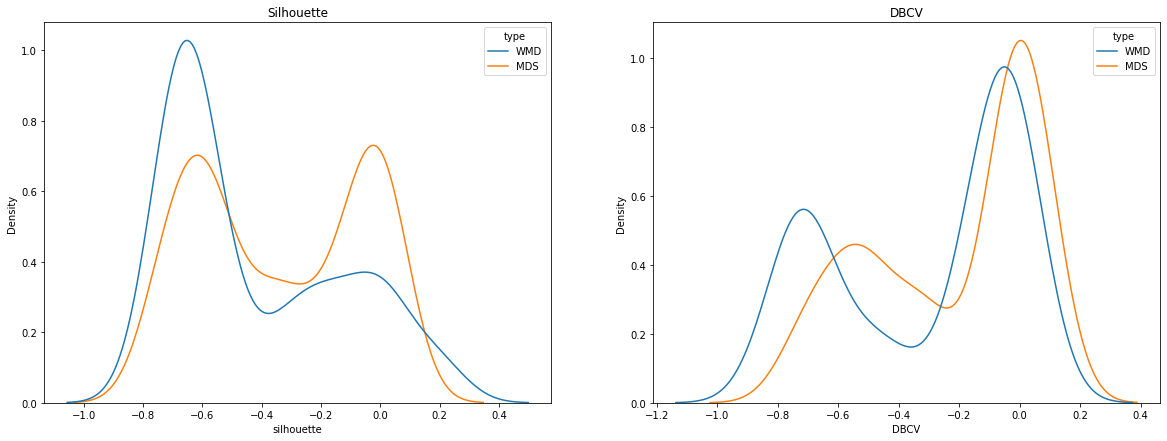

In [ ]:
plt.figure(figsize = (20,7))
sns.kdeplot(data=pd.concat([all_tsne_moy]).reset_index(),x="silhouette",hue="type",ax=plt.subplot(1,2,1,title="Silhouette"))
sns.kdeplot(data=pd.concat([all_tsne_moy]).reset_index(),x="DBCV",hue="type",ax=plt.subplot(1,2,2,title="DBCV"))

### Non classe Distribution

<AxesSubplot:title={'center':'DBCV'}, xlabel='DBCV', ylabel='non_classes'>

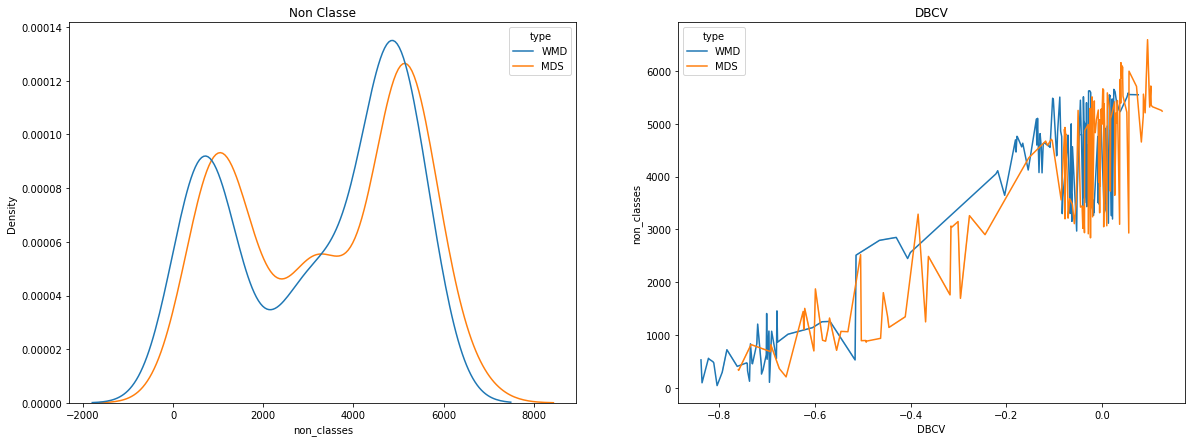

In [ ]:
plt.figure(figsize = (20,7))
sns.kdeplot(data=pd.concat([all_tsne_moy]).reset_index(),x="non_classes",hue="type",ax=plt.subplot(1,2,1,title="Non Classe"))
sns.lineplot(data=pd.concat([all_tsne_moy]).reset_index(),y="non_classes",x="DBCV",hue="type",ax=plt.subplot(1,2,2,title="DBCV"))

### Metric distribution in function of other parameters

<AxesSubplot:title={'center':'DBCV'}, xlabel='min_cluster_size', ylabel='silhouette'>

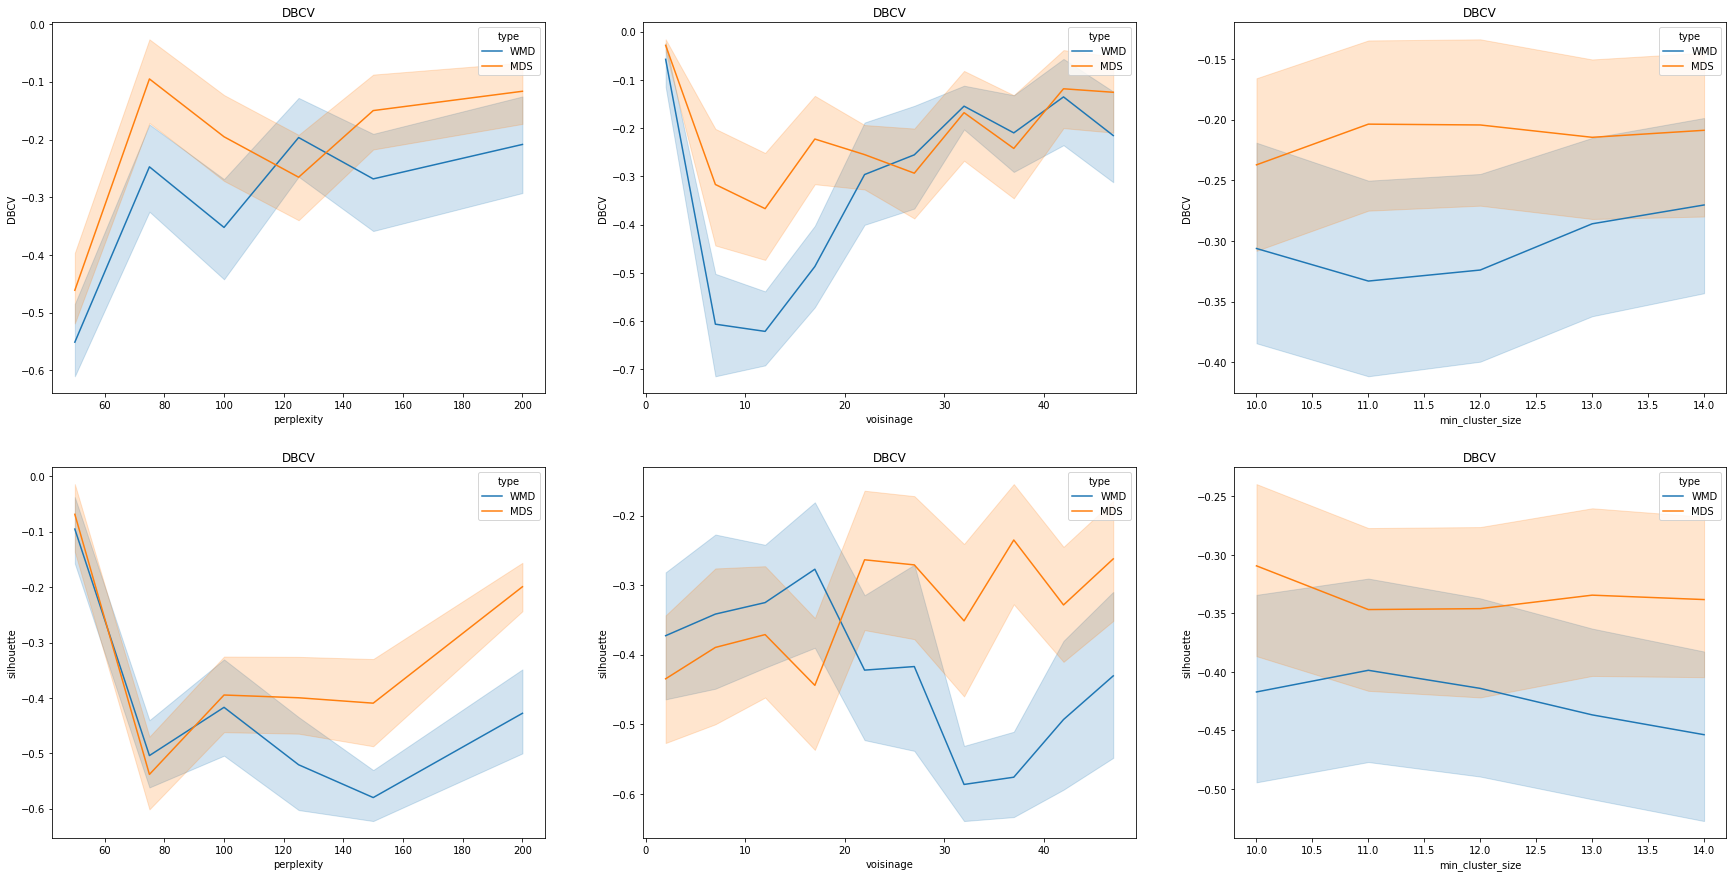

In [ ]:
plt.figure(figsize = (30,15))

sns.lineplot(data=pd.concat([all_tsne_moy]).reset_index(),y="DBCV",x="perplexity",hue="type",ax=plt.subplot(2,3,1,title="DBCV"))
sns.lineplot(data=pd.concat([all_tsne_moy]).reset_index(),y="DBCV",x="voisinage",hue="type",ax=plt.subplot(2,3,2,title="DBCV"))
sns.lineplot(data=pd.concat([all_tsne_moy,all_tsne_mds]).reset_index(),y="DBCV",x="min_cluster_size",hue="type",ax=plt.subplot(2,3,3,title="DBCV"))

sns.lineplot(data=pd.concat([all_tsne_moy]).reset_index(),y="silhouette",x="perplexity",hue="type",ax=plt.subplot(2,3,4,title="DBCV"))
sns.lineplot(data=pd.concat([all_tsne_moy]).reset_index(),y="silhouette",x="voisinage",hue="type",ax=plt.subplot(2,3,5,title="DBCV"))
sns.lineplot(data=pd.concat([all_tsne_moy]).reset_index(),y="silhouette",x="min_cluster_size",hue="type",ax=plt.subplot(2,3,6,title="DBCV"))

### Best models 
#### Include All model

In [ ]:
#moy
best_tsne_moy = all_tsne_moy.iloc[np.argmax(all_tsne_moy["DBCV"])]
tsne = TSNE(n_components = 2, perplexity=best_tsne_moy["perplexity"], n_iter=2000, random_state=0)
tsne_moy = tsne.fit_transform(mat_skipgram_moy)

model_moy = HD.HDBSCAN(min_cluster_size=int(best_tsne_moy["min_cluster_size"]), metric = "euclidean",min_samples=int(best_tsne_moy["voisinage"]))
best_labels_moy = model_moy.fit_predict(np.array(tsne_moy).astype(np.float64))

print("Best Tsne moy")
pd.DataFrame(best_tsne_moy).transpose()

/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


Best Tsne WMD


,index,voisinage,min_cluster_size,distance,K,silhouette,Cal-Harabasz,DBCV,non_classes,perplexity,type
250,5,7,10,euclidean,139,-0.742878,44.810252,0.075397,5551,200,WMD


<Figure size 2160x720 with 0 Axes>

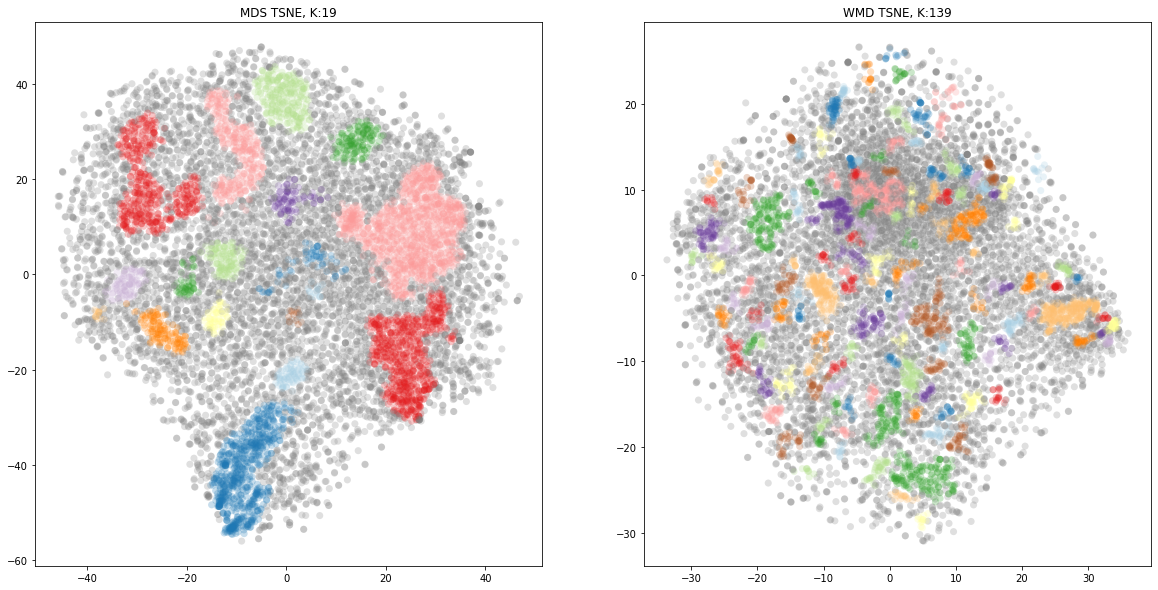

In [ ]:
plt.figure(figsize = (30,10))

# moy
color_palette = sns.color_palette('Paired', len(np.unique(best_labels_moy)))
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in best_labels_moy]
plt.subplot(1,1,1,title=f"moy TSNE, K:{len(np.unique(best_labels_moy))}").scatter(tsne_moy[:,0],tsne_moy[:,1], s=50, linewidth=0, c=cluster_colors, alpha=0.25)

#### Only K <= max_K

In [ ]:
max_K = 20

In [ ]:
#moy
filtred_tsne_moy = all_tsne_moy.loc[all_tsne_moy["K"]<=max_K,]
best_tsne_moy = filtred_tsne_moy.iloc[np.argmax(filtred_tsne_moy["DBCV"])]
tsne = TSNE(n_components = 2, perplexity=best_tsne_moy["perplexity"], n_iter=2000, random_state=0)
tsne_moy = tsne.fit_transform(mat_skipgram_moy)

model_moy = HD.HDBSCAN(min_cluster_size=int(best_tsne_moy["min_cluster_size"]), metric = "euclidean",min_samples=int(best_tsne_moy["voisinage"]))
best_labels_moy = model_moy.fit_predict(np.array(tsne_moy).astype(np.float64))

print(f"Best Tsne moy with K <= {max_K}")
pd.DataFrame(best_tsne_moy).transpose()

/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


Best Tsne WMD with K <= 20


,index,voisinage,min_cluster_size,distance,K,silhouette,Cal-Harabasz,DBCV,non_classes,perplexity,type
150,41,42,11,euclidean,19,-0.705792,216.759589,0.054907,5555,125,WMD


<Figure size 2160x720 with 0 Axes>

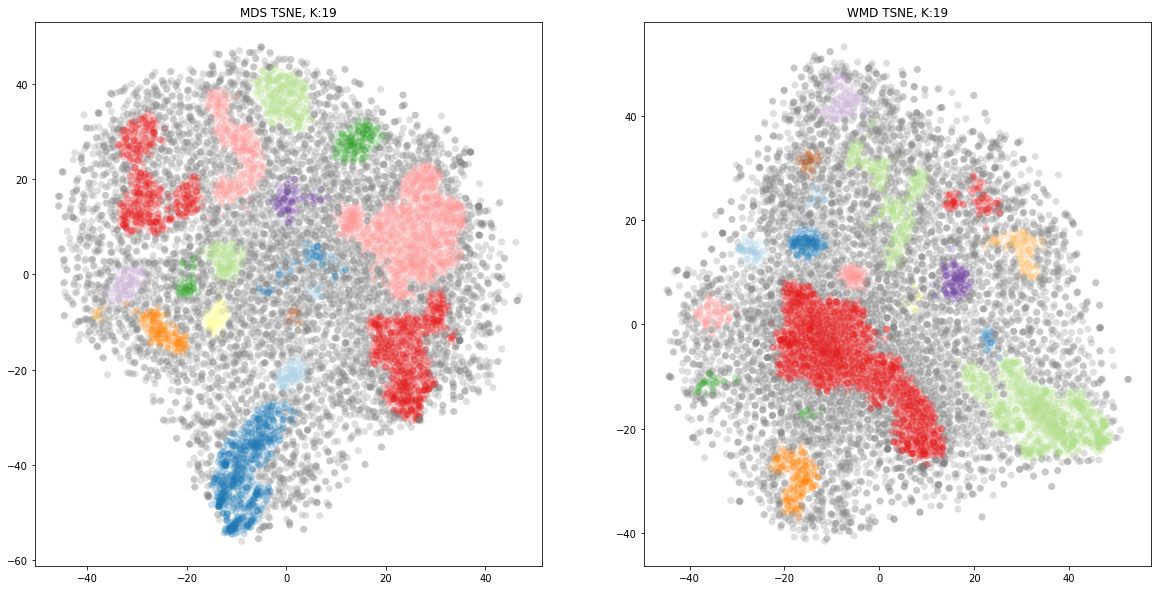

In [ ]:
plt.figure(figsize = (30,10))

# moy
color_palette = sns.color_palette('Paired', len(np.unique(best_labels_moy)))
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in best_labels_moy]
plt.subplot(1,1,1,title=f"moy TSNE, K:{len(np.unique(best_labels_moy))}").scatter(tsne_moy[:,0],tsne_moy[:,1], s=50, linewidth=0, c=cluster_colors, alpha=0.25)

## Sans TSNE

In [ ]:
df_hdbscan_skipgram_moy,all_skipgram_moy_labels = CL.selection_meilleur_hdbscan(data=mat_skipgramgram_moy,listeDistances="euclidean",listeMinClusterSize=range(10,15),listeVoisinage=range(2,50,5))

Recherche optimale - HDBScan
0% 2% 6% 12% 16% 22% 26% 32% 36% 42% 46% 52% 56% 62% 66% 72% 76% 82% 86% 92% 96% 
 
Recherche optimale - HDBScan
0% 2% 6% 12% 16% 22% 26% 32% 36% 42% 46% 52% 56% 62% 66% 72% 76% 82% 86% 92% 96% 
 


In [ ]:
df_hdbscan_skipgram_moy["type"] = "moy"

,voisinage,min_cluster_size,distance,K,silhouette,Cal-Harabasz,DBCV,non_classes,type
5,7,10,precomputed,3,-0.103282,None,0.050028,7601,MDS
10,12,10,precomputed,3,-0.081802,None,0.048308,7346,MDS
24,22,14,precomputed,3,-0.212183,None,0.031408,8480,MDS
20,22,10,precomputed,3,-0.212183,None,0.031408,8480,MDS
22,22,12,precomputed,3,-0.212183,None,0.031408,8480,MDS
23,22,13,precomputed,3,-0.212183,None,0.031408,8480,MDS
21,22,11,precomputed,3,-0.212183,None,0.031408,8480,MDS
11,12,11,precomputed,3,-0.218665,None,0.029913,8608,MDS
12,12,12,precomputed,3,-0.218665,None,0.029913,8608,MDS
13,12,13,precomputed,3,-0.218665,None,0.029913,8608,MDS


### Metric Distribution

<AxesSubplot:title={'center':'DBCV'}, xlabel='DBCV', ylabel='Density'>

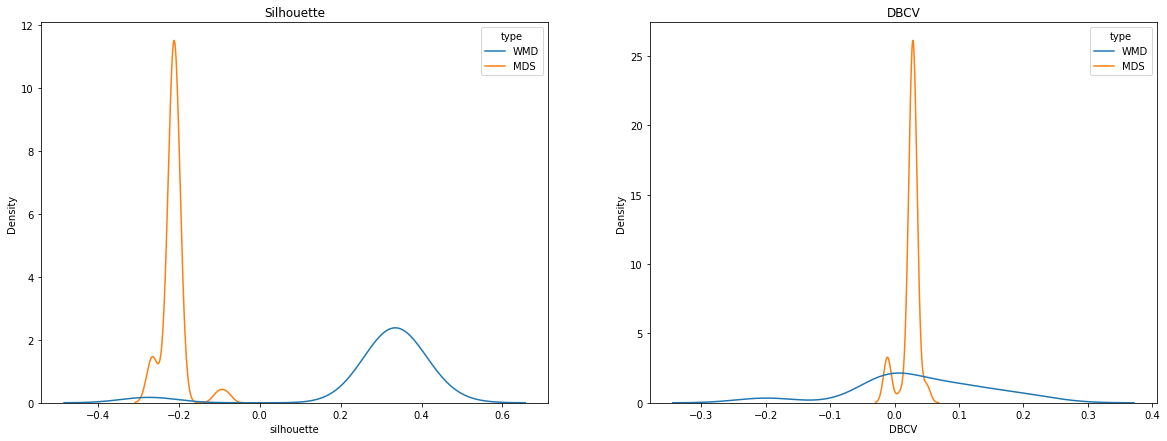

In [ ]:
plt.figure(figsize = (20,7))
sns.kdeplot(data=pd.concat([df_hdbscan_skipgram_moy]).reset_index(),x="silhouette",hue="type",ax=plt.subplot(1,2,1,title="Silhouette"))
sns.kdeplot(data=pd.concat([df_hdbscan_skipgram_moy]).reset_index(),x="DBCV",hue="type",ax=plt.subplot(1,2,2,title="DBCV"))

### Non classe distribution

<AxesSubplot:title={'center':'DBCV'}, xlabel='DBCV', ylabel='non_classes'>

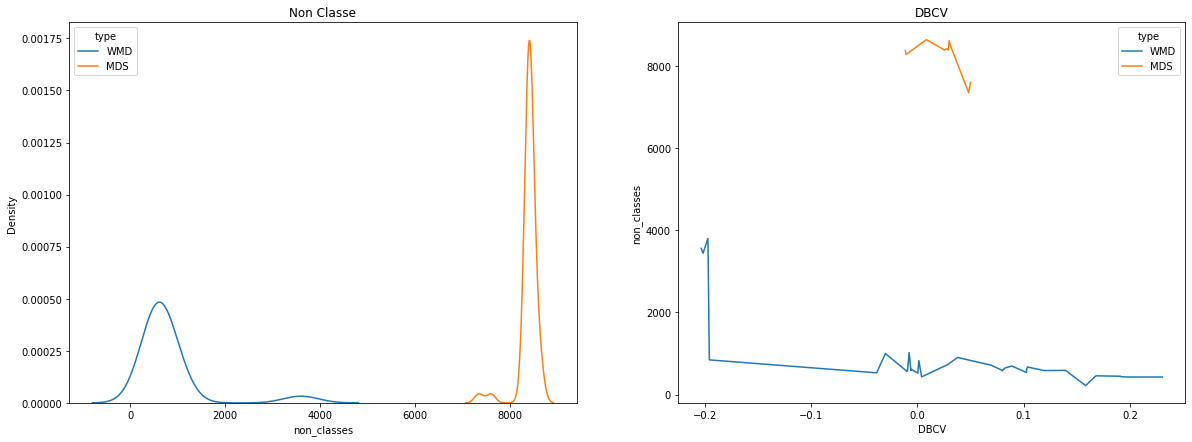

In [ ]:
plt.figure(figsize = (20,7))
sns.kdeplot(data=pd.concat([df_hdbscan_skipgram_moy]).reset_index(),x="non_classes",hue="type",ax=plt.subplot(1,2,1,title="Non Classe"))
sns.lineplot(data=pd.concat([df_hdbscan_skipgram_moy]).reset_index(),y="non_classes",x="DBCV",hue="type",ax=plt.subplot(1,2,2,title="DBCV"))

### Metric distribution in function of other parameters

<AxesSubplot:title={'center':'DBCV'}, xlabel='min_cluster_size', ylabel='silhouette'>

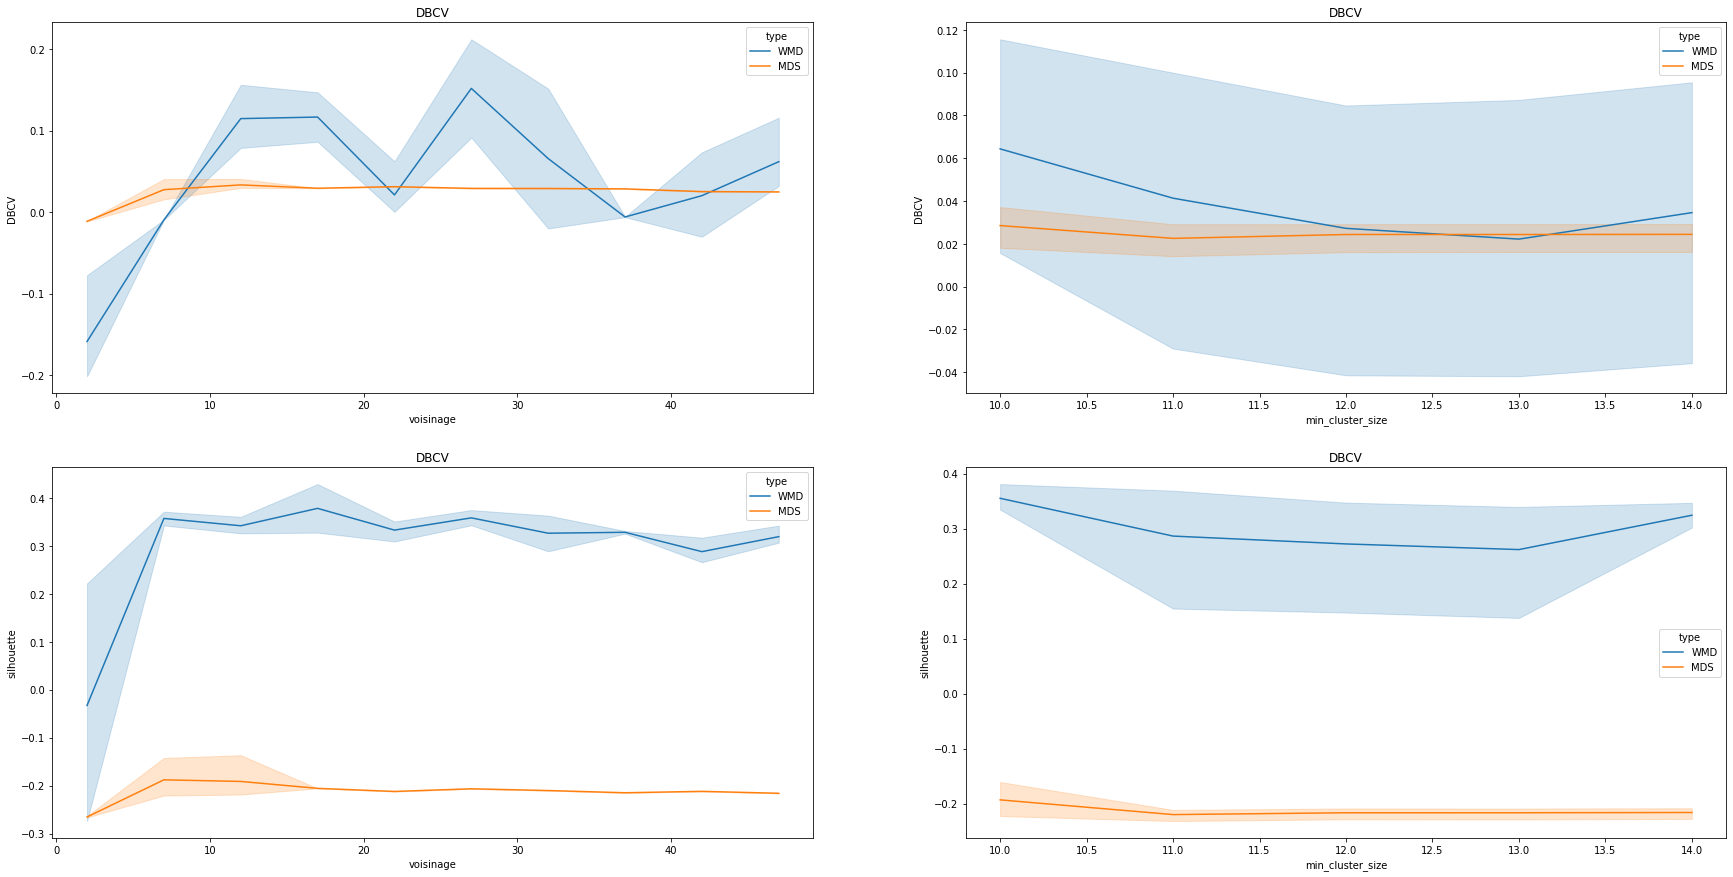

In [ ]:
plt.figure(figsize = (30,15))

sns.lineplot(data=pd.concat([df_hdbscan_skipgram_moy]).reset_index(),y="DBCV",x="voisinage",hue="type",ax=plt.subplot(2,2,1,title="DBCV"))
sns.lineplot(data=pd.concat([df_hdbscan_skipgram_moy]).reset_index(),y="DBCV",x="min_cluster_size",hue="type",ax=plt.subplot(2,2,2,title="DBCV"))

sns.lineplot(data=pd.concat([df_hdbscan_skipgram_moy]).reset_index(),y="silhouette",x="voisinage",hue="type",ax=plt.subplot(2,2,3,title="DBCV"))
sns.lineplot(data=pd.concat([df_hdbscan_skipgram_moy]).reset_index(),y="silhouette",x="min_cluster_size",hue="type",ax=plt.subplot(2,2,4,title="DBCV"))

### Best models 

In [ ]:
#moy
best_moy = df_hdbscan_skipgram_moy.iloc[np.argmax(df_hdbscan_skipgram_moy["DBCV"])]

model_moy = HD.HDBSCAN(min_cluster_size=int(best_moy["min_cluster_size"]), metric = "euclidean",min_samples=int(best_moy["voisinage"]))
best_labels_moy = model_moy.fit_predict(np.array(mat_skipgram_moy).astype(np.float64))

print("Best moy")
pd.DataFrame(best_moy).transpose()

Best WMD


,voisinage,min_cluster_size,distance,K,silhouette,Cal-Harabasz,DBCV,non_classes,type
29,27,14,precomputed,3,0.380373,None,0.230429,427,WMD


In [ ]:
print(HD.validity_index(np.array(mat_skipgram_moy).astype(np.float64),best_labels_moy,metric="euclidean",d=20))
np.unique(best_labels_moy,return_counts=True)

0.2304285805837383


(array([-1,  0,  1]), array([ 427, 9060,   14]))

<Figure size 2160x720 with 0 Axes>

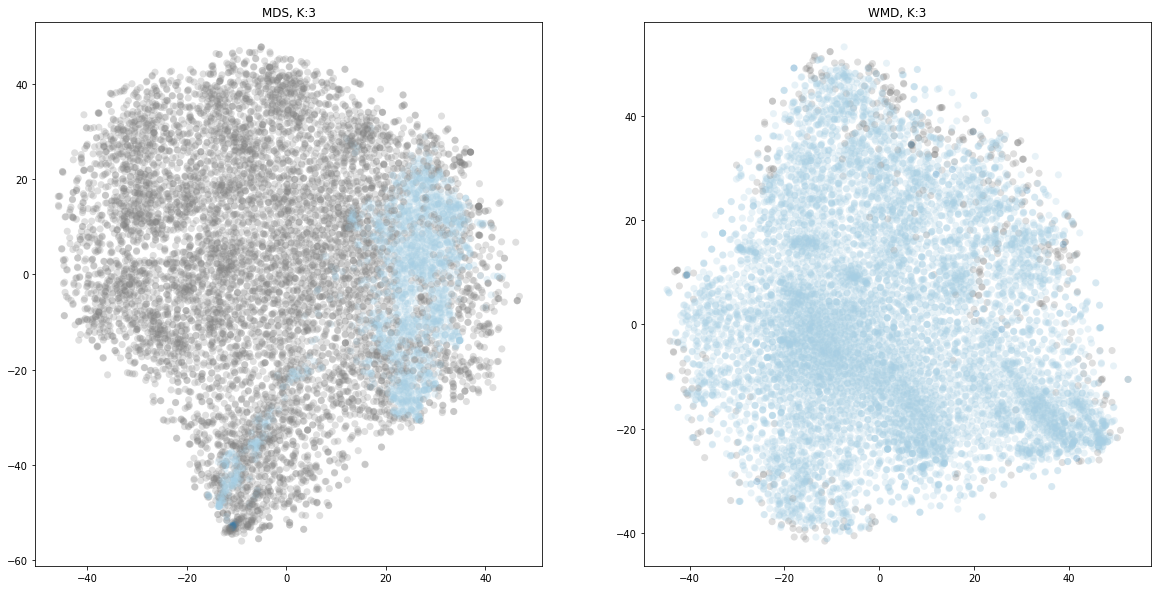

In [ ]:
plt.figure(figsize = (30,10))

# moy
color_palette = sns.color_palette('Paired', len(np.unique(best_labels_moy)))
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in best_labels_moy]
plt.subplot(1,1,1,title=f"moy, K:{len(np.unique(best_labels_moy))}").scatter(tsne_moy[:,0],tsne_moy[:,1], s=50, linewidth=0, c=cluster_colors, alpha=0.25)